In [1]:
import pandas as pd
import os

from maca import clean_annotation, clean_labels

metadata_folder = os.path.join('..', 'metadata' )

annotation_folder = os.path.join(metadata_folder, 'manual_annotations')
# annotation_folder

summary_folder = os.path.join(metadata_folder, 'summary')
! mkdir $summary_folder


mkdir: ../metadata/summary: File exists


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
! conda list -n maca

# packages in environment at /Users/olgabot/anaconda3/envs/maca:
#
appnope                   0.1.0                    py36_0  
beautifulsoup4            4.6.0                     <pip>
bkcharts                  0.2                      py36_0  
bokeh                     0.12.6                   py36_0  
certifi                   2017.4.17                 <pip>
chardet                   3.0.4                     <pip>
click                     6.7                       <pip>
curl                      7.49.0                        1  
cycler                    0.10.0                   py36_0  
dash                      0.17.7                    <pip>
dash-core-components      0.5.1                     <pip>
dash-html-components      0.6.2                     <pip>
dash-renderer             0.7.3                     <pip>
dash.ly                   0.17.3                    <pip>
decorator                 4.0.11                   py36_0  
fastcluster               1.1.23              np113

In [4]:
csv = os.path.join(metadata_folder, 'maca_3month_annotations_plates.csv')

cell_annotations = pd.read_csv(csv, index_col=0)
print(cell_annotations.shape)
cell_annotations.head()

(42192, 5)


,annotation,plate.barcode,subannotation,tissue,annotation_subannotation
A21.MAA000594.3_8_M.1.1,fibroblasts,MAA000594,NaN,Aorta,fibroblasts
F8.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
H11.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
A22.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
H12.MAA000594.3_8_M.1.1,adipocytes,MAA000594,NaN,Aorta,adipocytes


Make sure there's no `stromal_mesenchymal_stem_cell_cells`

In [5]:
cell_annotations.query('tissue == "Thymus"').groupby('annotation').size()

annotation
stromal_stem      33
t_cells         1250
dtype: int64

In [6]:
figure_folder = '/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures'

figure1_folder = f'{figure_folder}/figure1/plates'
figure2_folder = f'{figure_folder}/figure2/plates'

print(f'figure1_folder: "{figure1_folder}"')
print(f'figure2_folder: "{figure2_folder}"')

! mkdir -p "$figure1_folder"
! mkdir -p "$figure2_folder"

figure1_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/figure1/plates"
figure2_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/figure2/plates"


In [7]:
folder = os.path.join(metadata_folder, 'number_of_cells_reads_genes/')

In [8]:
ls $folder

Aorta_cell_numbers.csv             Lung_cell_numbers.csv
Aorta_nreads_ngenes.csv            Lung_nreads_ngenes.csv
Bladder_cell_numbers.csv           Mammary_cell_numbers.csv
Bladder_nreads_ngenes.csv          Mammary_nreads_ngenes.csv
Brain_Microglia_cell_numbers.csv   Marrow_cell_numbers.csv
Brain_Microglia_nreads_ngenes.csv  Marrow_nreads_ngenes.csv
Brain_Neurons_cell_numbers.csv     Muscle_cell_numbers.csv
Brain_Neurons_nreads_ngenes.csv    Muscle_nreads_ngenes.csv
Colon_cell_numbers.csv             Pancreas_cell_numbers.csv
Colon_nreads_ngenes.csv            Pancreas_nreads_ngenes.csv
Diaphragm_cell_numbers.csv         Skin_cell_numbers.csv
Diaphragm_nreads_ngenes.csv        Skin_nreads_ngenes.csv
Fat_cell_numbers.csv               Spleen_cell_numbers.csv
Fat_nreads_ngenes.csv              Spleen_nreads_ngenes.csv
Heart_cell_numbers.csv             Thymus_cell_numbers.csv
Heart_nreads_ngenes.csv            Thymus_nreads_ngenes.csv
Kidney_cell_numbers.csv            Tongue_cell_num

In [9]:
import hermione as hm

In [10]:
! head $folder/Aorta*

==> ../metadata/number_of_cells_reads_genes//Aorta_cell_numbers.csv <==
"","Aorta"
"n_genes",19721
"n_cells_pass_qc",364
"n_cells_sequenced",1113

==> ../metadata/number_of_cells_reads_genes//Aorta_nreads_ngenes.csv <==
"","nGene","nReads","orig.ident"
"A21.MAA000594.3_8_M.1.1",3850,1848089,"Heart"
"F8.MAA000594.3_8_M.1.1",788,55689,"Heart"
"H11.MAA000594.3_8_M.1.1",554,318135,"Heart"
"A22.MAA000594.3_8_M.1.1",1279,270173,"Heart"
"H12.MAA000594.3_8_M.1.1",946,278892,"Heart"
"L9.MAA000594.3_8_M.1.1",798,196845,"Heart"
"P17.MAA000594.3_8_M.1.1",3531,818237,"Heart"
"D6.MAA000594.3_8_M.1.1",584,246067,"Heart"
"F14.MAA000594.3_8_M.1.1",1085,50291,"Heart"


In [11]:
import glob
import os 

globber = f'{folder}/*_nreads_ngenes.csv'

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)

print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(43426, 4)
20


,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta


In [12]:
import numpy as np

In [13]:
nreads_ngenes['log10 nReads'] = np.log10(nreads_ngenes['nReads'])

In [14]:
colors = pd.read_csv(os.path.join(metadata_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta              #1f77b4
Bladder            #aec7e8
Brain_Microglia    #ff7f0e
Brain_Neurons      #ffbb78
Colon              #2ca02c
Diaphragm          #98df8a
Fat                #d62728
Heart              #ff9896
Kidney             #9467bd
Liver              #c5b0d5
Lung               #8c564b
Mammary            #c49c94
Marrow             #e377c2
Muscle             #f7b6d2
Pancreas           #7f7f7f
Skin               #c7c7c7
Spleen             #bcbd22
Thymus             #dbdb8d
Tongue             #17becf
Trachea            #9edae5
Name: color, dtype: object

In [15]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')
cell_annotations['tissue'] = cell_annotations['tissue'].str.replace('_', ' ')

In [16]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain Microglia',
 'Brain Neurons',
 'Colon',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary',
 'Marrow',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [17]:
kwargs = dict(data=nreads_ngenes, row='tissue', facet_kws=dict(sharex=True),
               row_order=tissues, palette=colors, xlabel_suffix='')

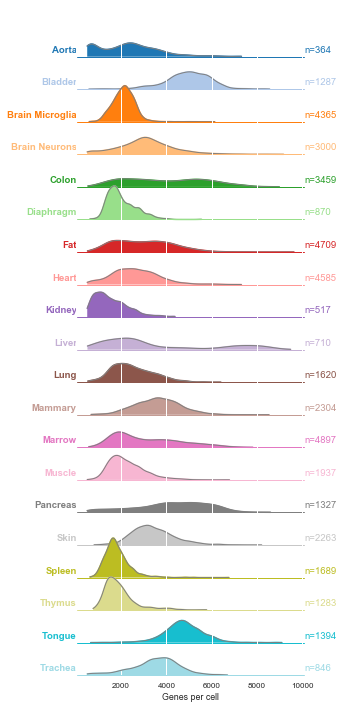

In [26]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')

for ax in g.axes.flatten():
    # Add white gridlines
    xticks = ax.get_xticks()
    xmin, xmax, ymin, ymax = ax.axis()
    ax.vlines(xticks, ymin, 1.2*ymax, color='white', clip_on=False, linewidth=1)
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)

g.savefig(f'{figure1_folder}/horizonplot_genes_per_cell.pdf')

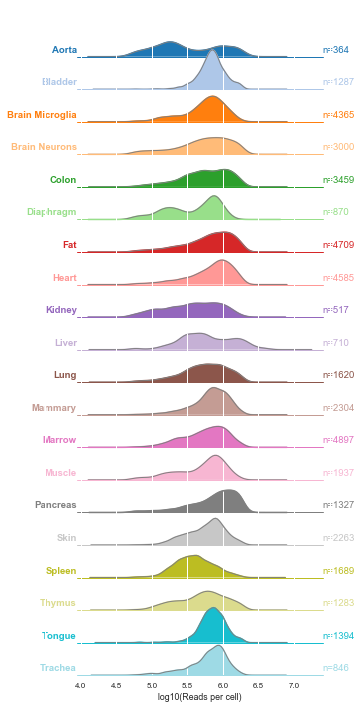

In [30]:
g = hm.horizonplot(x='log10 nReads', **kwargs)
g.set_xlabels('log10(Reads per cell)')

for ax in g.axes.flatten():
    # Add white gridlines
    xticks = ax.get_xticks()
    xmin, xmax, ymin, ymax = ax.axis()
    ax.vlines(xticks, ymin, 1.2*ymax, color='white', clip_on=False, linewidth=1)
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)


g.savefig(f'{figure1_folder}/horizonplot_log10_reads_per_cell.pdf')

In [20]:
n_cells_per_tissue = nreads_ngenes.groupby('tissue').size().reset_index()
n_cells_per_tissue = n_cells_per_tissue.rename(columns={0: 'n_cells'})
n_cells_per_tissue

,tissue,n_cells
0,Aorta,364
1,Bladder,1287
2,Brain Microglia,4365
3,Brain Neurons,3000
4,Colon,3459
5,Diaphragm,870
6,Fat,4709
7,Heart,4585
8,Kidney,517
9,Liver,710


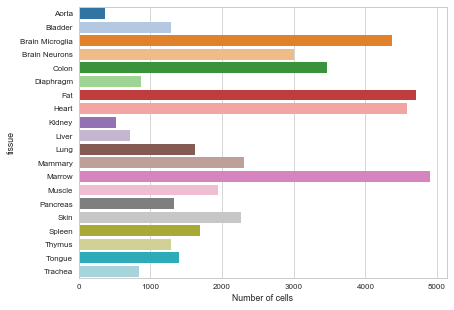

In [21]:
fig, ax = plt.subplots()
sns.barplot(x='n_cells', y='tissue', data=n_cells_per_tissue, palette=colors, order=tissues)
ax.set(xlabel='Number of cells')
fig.tight_layout()
fig.savefig(f'{figure1_folder}/barplot_n_cells_per_tissue.pdf')

In [22]:
n_tissues = len(tissues)
n_tissues

20

In [23]:
pd.Series(tissues)

0               Aorta
1             Bladder
2     Brain Microglia
3       Brain Neurons
4               Colon
5           Diaphragm
6                 Fat
7               Heart
8              Kidney
9               Liver
10               Lung
11            Mammary
12             Marrow
13             Muscle
14           Pancreas
15               Skin
16             Spleen
17             Thymus
18             Tongue
19            Trachea
dtype: object

In [24]:
cell_annotations.groupby('tissue').apply(lambda x: len(x.groupby('annotation_subannotation')))

tissue
Aorta               6
Bladder             5
Brain Microglia     2
Brain Neurons      14
Colon               8
Diaphragm           5
Fat                10
Heart               9
Kidney              7
Liver               5
Lung               17
Mammary            10
Marrow             12
Muscle              6
Pancreas            9
Skin                6
Spleen              6
Thymus              8
Tongue              5
Trachea             6
dtype: int64

width: 2.9921259842400003, height: 10.6299212598


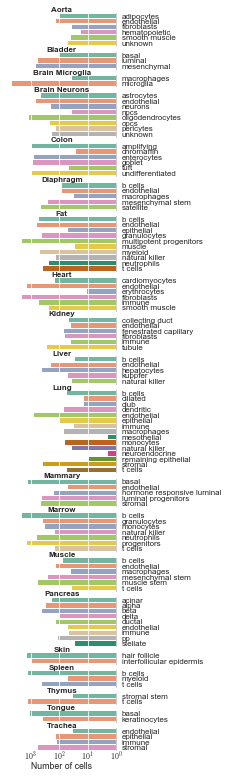

In [32]:
mm_to_inch = 0.03937007874

width = 76 * mm_to_inch
height = 270 * mm_to_inch

print(f'width: {width}, height: {height}')

col = 'annotation'

height_ratios = cell_annotations.groupby('tissue').apply(lambda x: len(x[col].unique()))

fig, axes = plt.subplots(figsize=(width, height), nrows=len(tissues), sharex=True, 
                         gridspec_kw=dict(height_ratios=height_ratios))

palette = sns.color_palette('Set2', n_colors=8) + sns.color_palette('Dark2', n_colors=8)

for (tissue, df), ax in zip(cell_annotations.groupby('tissue'), axes):
#     print(f'\n--- {tissue} ---')
    annotation_subannotation = np.log10(df.groupby(col).size()).reset_index()
    annotation_subannotation = annotation_subannotation.rename(columns={0: 'n_cells'})
    annotation_subannotation['annotation'] = annotation_subannotation['annotation'].str.replace('_', ' ')
#     print(annotation_subannotation)
#     print(len(annotation_subannotation))
    
    
#     fig, ax = plt.subplots(figsize=(width, height))
    sns.barplot(x='n_cells', y=col, data=annotation_subannotation, palette=palette, ax=ax, zorder=-1)
#     fig.tight_layout()
    ax.set(xlabel='', ylabel='')

    # Remove "FACS"
    tissue = tissue.replace('_FACS', '').replace('_', ' ')
    ax.set_title(tissue, va='top', fontweight='bold', size=8)
    
    ax.yaxis.set_ticks_position("right")
#     ax.set_ylabel(tissue, rotation=0, ha='right')
    
    # only y-axis grid
#     ax.grid(axis='x')
    ax.grid(axis='x', zorder=100, color='white')
    ax.grid('off', axis='y')
    
    ax.spines['left'].set_visible(False)

    if ax.is_last_row():
        
        xticklabels = [f'$10^{int(i)}$' for i in ax.get_xticks()]
        ax.set_xlabel('Number of cells', va='center')
        ax.set_xticklabels(xticklabels, va='center')

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
        
 
ax.invert_xaxis()
left, right = -0.05, 1.04
bottom, top = -0.015, 1.01
fig.tight_layout(h_pad=-0.1, rect=[left, bottom, right, top])
fig.savefig(f'{figure2_folder}/barplot_n_cells_per_annotation_all.pdf')
